In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
#read in dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


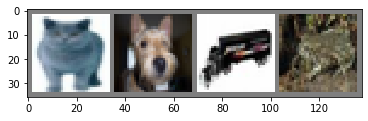

  cat   dog truck  frog


In [3]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = dataiter.next()
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
images

tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9608,  0.9765,  0.9686,  ...,  0.9765,  0.9765,  0.9686],
          [ 0.9451,  0.9765,  0.9686,  ...,  0.9686,  0.9765,  0.9686],
          ...,
          [ 0.9529,  0.9765,  0.9765,  ...,  0.9216,  0.9686,  0.9686],
          [ 0.9529,  0.9765,  0.9765,  ...,  0.9686,  0.9765,  0.9686],
          [ 0.9529,  0.9765,  0.9765,  ...,  0.9843,  0.9843,  0.9686]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9843,  0.9922,  0.9843,  ...,  0.9765,  0.9922,  0.9843],
          [ 0.9922,  1.0000,  0.9843,  ...,  0.9843,  0.9922,  0.9843],
          ...,
          [ 0.9843,  0.9922,  0.9843,  ...,  0.9451,  0.9843,  0.9843],
          [ 0.9922,  1.0000,  0.9843,  ...,  0.9608,  0.9843,  0.9843],
          [ 0.9922,  1.0000,  0.9843,  ...,  0.9686,  0.9922,  0.9843]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9765,  0.9843,  

In [4]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,10,3,1,1)
        self.pool1 = nn.AvgPool2d(2,2)
        self.conv2 = nn.Conv2d(10,20,3,1,1)
        self.pool2 = nn.AvgPool2d(2,2)
        self.fc1 = nn.Linear(1280,100)
        self.fc2 = nn.Linear(100,10)
       
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1,20*8*8)
        #x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        #x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
       # x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        #x = x.view(-1, self.num_flat_features(x))
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        
        
        return x

    
    #def num_flat_features(self, x):
    #    size = x.size()[1:]  # all dimensions except the batch dimension
    #    num_features = 1
    #    for s in size:
    #        num_features *= s
    #    return num_features
    
net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

In [7]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/xdg-cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 59.4MB/s]
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /tmp/xdg-cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:03<00:00, 62.0MB/s] 


In [9]:
resnet152 = models.resnet152(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /tmp/xdg-cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:01<00:00, 144MB/s]  


In [20]:
output = resnet152(images)

RuntimeError: bool value of Tensor with more than one value is ambiguous

In [18]:
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
print(torch.nn.functional.softmax(output[0], dim=0))


TypeError: 'ResNet' object is not subscriptable

https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

In [ ]:
def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):

    """3x3 convolution with padding"""

    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,

                     padding=dilation, groups=groups, bias=False, dilation=dilation)

In [ ]:
def conv1x1(in_planes, out_planes, stride=1):

    """1x1 convolution"""

    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

In [ ]:
class BasicBlock(nn.Module):

    expansion = 1



    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,

                 base_width=64, dilation=1, norm_layer=None):

        super(BasicBlock, self).__init__()

        if norm_layer is None:

            norm_layer = nn.BatchNorm2d

        if groups != 1 or base_width != 64:

            raise ValueError('BasicBlock only supports groups=1 and base_width=64')

        if dilation > 1:

            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")

        # Both self.conv1 and self.downsample layers downsample the input when stride != 1

        self.conv1 = conv3x3(inplanes, planes, stride)

        self.bn1 = norm_layer(planes)

        self.relu = nn.ReLU(inplace=True)

        self.conv2 = conv3x3(planes, planes)

        self.bn2 = norm_layer(planes)

        self.downsample = downsample

        self.stride = stride



    def forward(self, x):

        identity = x



        out = self.conv1(x)

        out = self.bn1(out)

        out = self.relu(out)



        out = self.conv2(out)

        out = self.bn2(out)



        if self.downsample is not None:

            identity = self.downsample(x)



        out += identity

        out = self.relu(out)



        return out



In [ ]:
class Bottleneck(nn.Module):

    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)

    # while original implementation places the stride at the first 1x1 convolution(self.conv1)

    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.

    # This variant is also known as ResNet V1.5 and improves accuracy according to

    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.



    expansion = 4



    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,

                 base_width=64, dilation=1, norm_layer=None):

        super(Bottleneck, self).__init__()

        if norm_layer is None:

            norm_layer = nn.BatchNorm2d

        width = int(planes * (base_width / 64.)) * groups

        # Both self.conv2 and self.downsample layers downsample the input when stride != 1

        self.conv1 = conv1x1(inplanes, width)

        self.bn1 = norm_layer(width)

        self.conv2 = conv3x3(width, width, stride, groups, dilation)

        self.bn2 = norm_layer(width)

        self.conv3 = conv1x1(width, planes * self.expansion)

        self.bn3 = norm_layer(planes * self.expansion)

        self.relu = nn.ReLU(inplace=True)

        self.downsample = downsample

        self.stride = stride



    def forward(self, x):

        identity = x



        out = self.conv1(x)

        out = self.bn1(out)

        out = self.relu(out)



        out = self.conv2(out)

        out = self.bn2(out)

        out = self.relu(out)



        out = self.conv3(out)

        out = self.bn3(out)



        if self.downsample is not None:

            identity = self.downsample(x)



        out += identity

        out = self.relu(out)



        return out





In [ ]:
class ResNet(nn.Module):



    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,

                 groups=1, width_per_group=64, replace_stride_with_dilation=None,

                 norm_layer=None):

        super(ResNet, self).__init__()

        if norm_layer is None:

            norm_layer = nn.BatchNorm2d

        self._norm_layer = norm_layer



        self.inplanes = 64

        self.dilation = 1

        if replace_stride_with_dilation is None:

            # each element in the tuple indicates if we should replace

            # the 2x2 stride with a dilated convolution instead

            replace_stride_with_dilation = [False, False, False]

        if len(replace_stride_with_dilation) != 3:

            raise ValueError("replace_stride_with_dilation should be None "

                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))

        self.groups = groups

        self.base_width = width_per_group

        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,

                               bias=False)

        self.bn1 = norm_layer(self.inplanes)

        self.relu = nn.ReLU(inplace=True)

        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0])

        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,

                                       dilate=replace_stride_with_dilation[0])

        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,

                                       dilate=replace_stride_with_dilation[1])

        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,

                                       dilate=replace_stride_with_dilation[2])

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc = nn.Linear(512 * block.expansion, num_classes)



        for m in self.modules():

            if isinstance(m, nn.Conv2d):

                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')

            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):

                nn.init.constant_(m.weight, 1)

                nn.init.constant_(m.bias, 0)



        # Zero-initialize the last BN in each residual branch,

        # so that the residual branch starts with zeros, and each residual block behaves like an identity.

        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677

        if zero_init_residual:

            for m in self.modules():

                if isinstance(m, Bottleneck):

                    nn.init.constant_(m.bn3.weight, 0)

                elif isinstance(m, BasicBlock):

                    nn.init.constant_(m.bn2.weight, 0)



    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):

        norm_layer = self._norm_layer

        downsample = None

        previous_dilation = self.dilation

        if dilate:

            self.dilation *= stride

            stride = 1

        if stride != 1 or self.inplanes != planes * block.expansion:

            downsample = nn.Sequential(

                conv1x1(self.inplanes, planes * block.expansion, stride),

                norm_layer(planes * block.expansion),

            )



        layers = []

        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,

                            self.base_width, previous_dilation, norm_layer))

        self.inplanes = planes * block.expansion

        for _ in range(1, blocks):

            layers.append(block(self.inplanes, planes, groups=self.groups,

                                base_width=self.base_width, dilation=self.dilation,

                                norm_layer=norm_layer))



        return nn.Sequential(*layers)



    def _forward_impl(self, x):

        # See note [TorchScript super()]

        x = self.conv1(x)

        x = self.bn1(x)

        x = self.relu(x)

        x = self.maxpool(x)



        x = self.layer1(x)

        x = self.layer2(x)

        x = self.layer3(x)

        x = self.layer4(x)



        x = self.avgpool(x)

        x = torch.flatten(x, 1)

        x = self.fc(x)



        return x



    def forward(self, x):

        return self._forward_impl(x)

